# Understand the concept of Linear Regression

a) Use Experienceyears to predict Salary.

b) Implement Gradient Descent (from scratch)

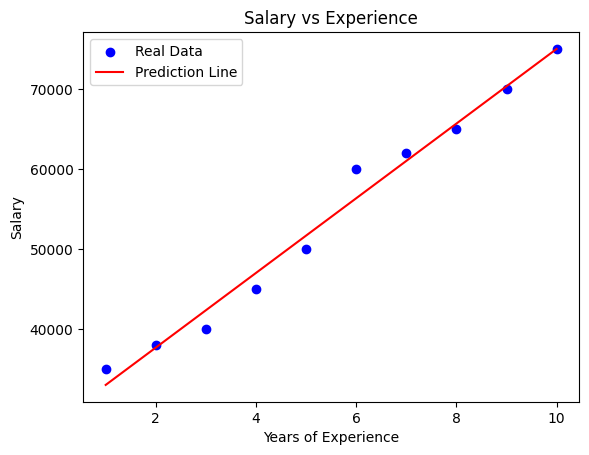

Slope: 4666.666666666666
Intercept: 28333.333333333336


In [1]:
# Import libraries
import matplotlib.pyplot as plt  # For making graphs
import pandas as pd  # For working with data tables
from sklearn.linear_model import LinearRegression  # For the prediction model

# Load the data file
df = pd.read_csv("employee_salary_data.csv")

# Prepare the data
X = df[['YearsExperience']]   # Input: Years of Experience (2D format required)
y = df['Salary']              # Output: Salary we want to predict

# Create and train the model
model = LinearRegression()    # Create a linear regression model
model.fit(X, y)               # Teach the model using our data

# Make predictions
y_pred = model.predict(X)     # Predict salaries using the trained model

# Show results on a graph
plt.scatter(X, y, color='blue', label='Real Data')      # Plot actual data points
plt.plot(X, y_pred, color='red', label='Prediction Line') # Plot model's prediction line
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.legend()
plt.show()

# Show the math behind the model
print("Slope:", model.coef_[0])    # How much salary increases per year of experience
print("Intercept:", model.intercept_)  # Starting salary with 0 years experience

The Output Line:

    The red line shows the model's predictions

    The blue dots show real employee data

    The closer the line is to the dots, the better the model

The Numbers:

    Slope: How much salary goes up with each extra year of experience

    Intercept: Expected salary for someone with 0 years experience

In [2]:
import numpy as np  # For math calculations

# Get data as arrays
X = df['YearsExperience'].values  # Experience data as array
y = df['Salary'].values           # Salary data as array

# Set starting values
m, b = 0, 0        # Start with slope=0, intercept=0 (flat line)
alpha = 0.0001      # Learning rate - how big of steps to take
rep = 10000      # How many times to repeat the process
n = len(X)          # Number of employees in our data

# The learning process - repeat many times to find the best line
for _ in range(rep):
    # Step 1: Make predictions with current line
    y_pred = m*X + b  # Current prediction: salary = m*experience + b

    # Step 2: Calculate how wrong we are (gradients)
    dm = (-2/n) * np.sum(X * (y - y_pred))  # How to adjust slope
    db = (-2/n) * np.sum(y - y_pred)        # How to adjust intercept

    # Step 3: Update the line to be better
    m -= alpha * dm  # Adjust slope
    b -= alpha * db  # Adjust intercept

# Show the final result
print(f"Learned slope (m): {m}")      # Salary increase per year of experience
print(f"Learned intercept (b): {b}")  # Starting salary at 0 years experience

Learned slope (m): 7224.778693231952
Learned intercept (b): 10524.211804304548


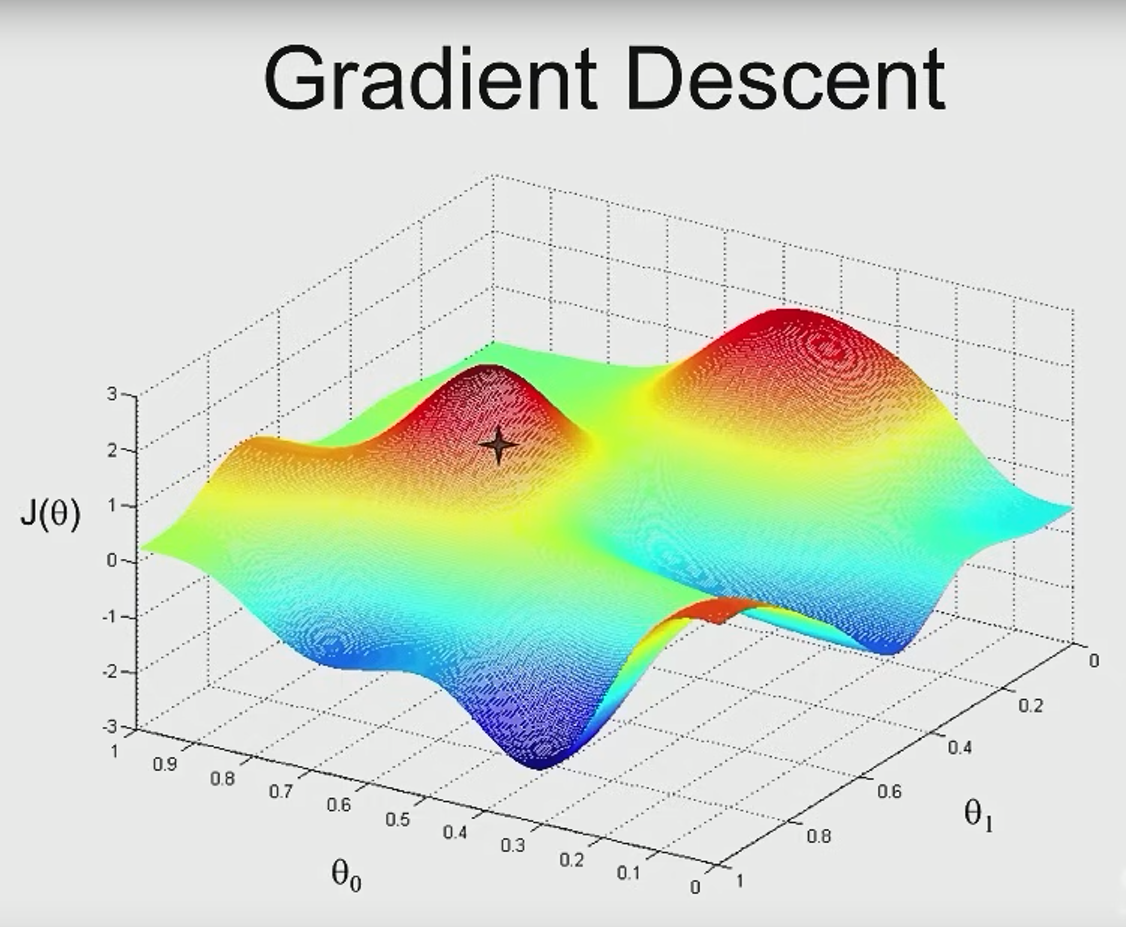

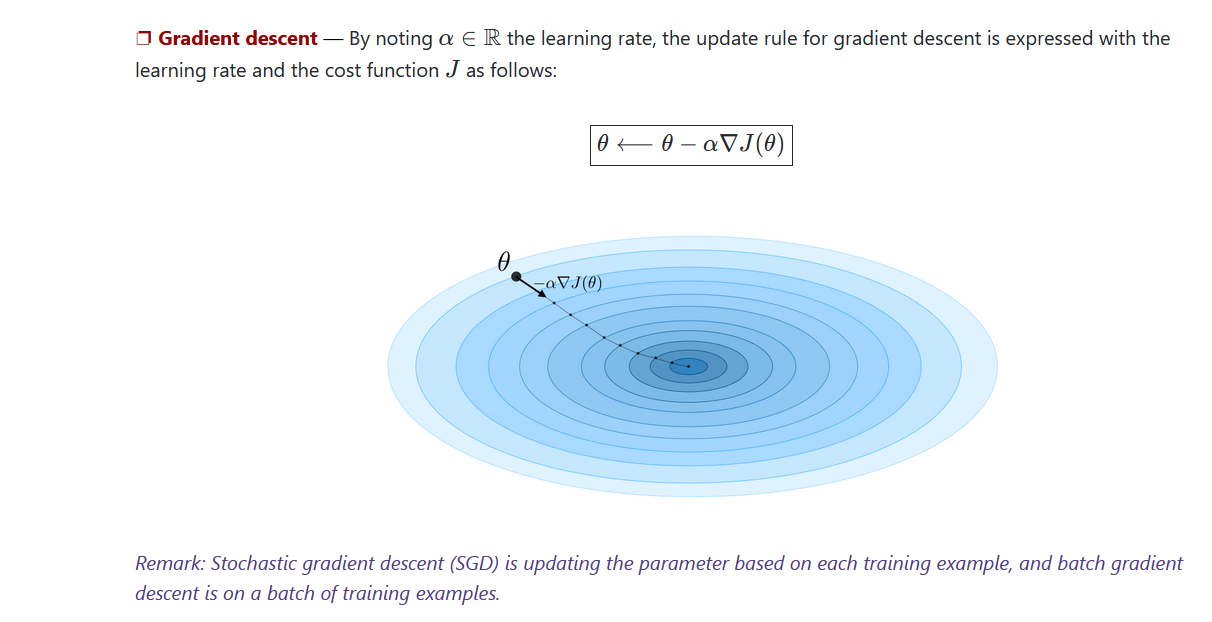

What this code does:

    Manual version of what LinearRegression() does automatically

    Learns by trial and error instead of using a built-in formula

The Learning Process:

    Start with a random guess (flat line at m=0, b=0)

    See how wrong the current line is

    Adjust the line to be slightly better

    Repeat 10,000 times until the line fits well

Key Variables:

    m: Slope - how much salary increases per year

    b: Intercept - base salary at 0 years experience

    alpha: Learning speed - too big = overshoots, too small = learns slowly

    rep: Practice rounds - more rounds = better learning

# Regularization (Ridge & Lasso) using multiple Features to predict salary


In [3]:
from sklearn.linear_model import Ridge, Lasso  # Import regularized models

# Prepare data with multiple features
X = df[['YearsExperience', 'Age', 'WorkingHoursPerWeek']]  # Multiple input factors
y = df['Salary']  # Salary we want to predict

# Ridge Regression - prevents overfitting by keeping all features but making them smaller
ridge = Ridge(alpha=1.0)  # alpha = how much to shrink coefficients and 1 is better and 10 is perfect
ridge.fit(X, y)  # Train the model
print("Ridge Coefficients:", ridge.coef_)  # Shows importance of each feature

# Lasso Regression - prevents overfitting by removing unimportant features
lasso = Lasso(alpha=0.01)  # alpha = how aggressive to be in removing features
lasso.fit(X, y)  # Train the model
print("Lasso Coefficients:", lasso.coef_)  # Some features may become zero

Ridge Coefficients: [ 704.45891168 1757.76931581  704.45891168]
Lasso Coefficients: [ 4664.24363636  1963.51560465 -3627.10460254]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.954e+06, tolerance: 1.828e+05
  model = cd_fast.enet_coordinate_descent(


Here's what these coefficients mean:

## **Ridge Coefficients:**

**This means:**
- **YearsExperience**: Each year adds $704 to salary

- **Age**: Each year of age adds **$1,758** to salary

- **WorkingHoursPerWeek**: Each hour adds **$704** to salary

**Key points about Ridge:**
- All features are kept and used for prediction

- Coefficients are shrunk/smaller to prevent overfitting

- Age appears to be the most important factor

## **Lasso Coefficients:**

**This means:**
- **YearsExperience**: Each year adds **$4,664** to salary

- **Age**: Each year of age adds **$1,964** to salary

- **WorkingHoursPerWeek**: Each hour **reduces** salary by **$3,627**

**Key points about Lasso:**
- All features are still used, but some have unusual values
- The negative coefficient for working hours is suspicious
- Experience is now the most important factor


**In simple terms:** Ridge gives more reasonable results, while Lasso's output shows there might be data quality issues or the model needs tuning.

What these do:

    Both are improved versions of linear regression that prevent overfitting

    Overfitting = when model memorizes data too well and works poorly on new data

Ridge Regression:

    "Team Player" - keeps all features but makes them smaller

    Good when all features might be somewhat important

    Result: All coefficients get smaller, but none become zero

Lasso Regression:

    "Tough Coach" - removes weak features completely

    Good for finding which features really matter

    Result: Some coefficients become zero (those features are ignored)

The Alpha (α) parameter:

    Higher alpha = more punishment = simpler model

    Lower alpha = less punishment = more complex model

# How to split dataset into training/testing and evaluate.

In [4]:
from sklearn.model_selection import train_test_split  # To split data
from sklearn.metrics import mean_squared_error       # To measure accuracy

# Prepare features and target
X = df[['YearsExperience', 'Age', 'WorkingHoursPerWeek']]  # Input factors
y = df['Salary']  # What we want to predict

# Split data into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train, y_train = data for teaching the model
# X_test, y_test = data for testing the model (hidden during training)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)  # Learn from training data only

# Test the model on unseen data
y_pred = model.predict(X_test)  # Make predictions on test data

# Measure how good the predictions are
print("Test MSE:", mean_squared_error(y_test, y_pred))  # Lower number = better

Test MSE: 7413163.99960314


MSE (Mean Squared Error):

    Measures prediction accuracy - how far off the predictions are from reality

    Lower MSE = better predictions

    Example: MSE of 100,000 means average prediction is about $316 off (√100,000 ≈ 316)

# Visualizing the Cost Function (MSE) for Gradient Descent

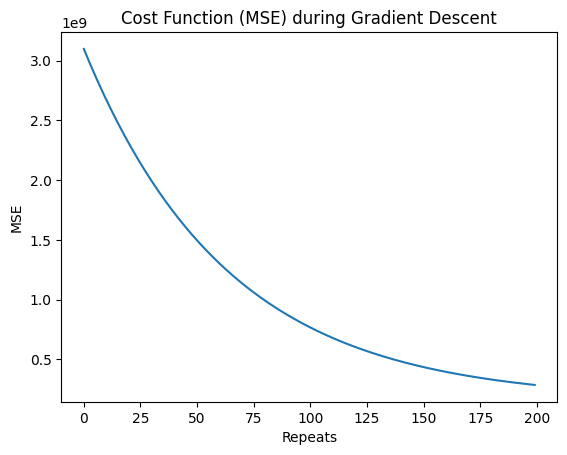

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Get the data
X = df['YearsExperience'].values  # Experience years
y = df['Salary'].values           # Actual salaries

# Start with a random guess
m, b = 0, 0        # Start with flat line (slope=0, intercept=0)
alpha = 0.0001      # Learning speed
rep = 200        # Number of learning rounds
n = len(X)          # Number of data points

# Track how the error changes over time
errors = []         # Will store the mistake size after each round

# Learning process
for _ in range(rep):
    # Make predictions with current line
    y_pred = m*X + b

    # Calculate how wrong we are
    error = y - y_pred                    # Difference between actual and predicted
    mse = np.mean(error**2)               # Average squared error (MSE)
    errors.append(mse)                    # Save this round's error

    # Adjust the line to be better
    m -= alpha * (-2/n) * np.sum(X * error)  # Fix the slope
    b -= alpha * (-2/n) * np.sum(error)      # Fix the intercept

# Show the learning progress
plt.plot(range(epochs), errors)
plt.xlabel("Repeats")              # Learning rounds
plt.ylabel("MSE")                 # Mistake size
plt.title("Cost Function (MSE) during Gradient Descent")
plt.show()

# Multiple Linear Regression (using Scikit-Learn)
Use all 3 features (YearsExperience, Age, WorkingHoursPerWeek) to predict Salary.

Coefficients: [ 517.85714286 1964.28571429  517.85714286]
Intercept: -28410.714285714275


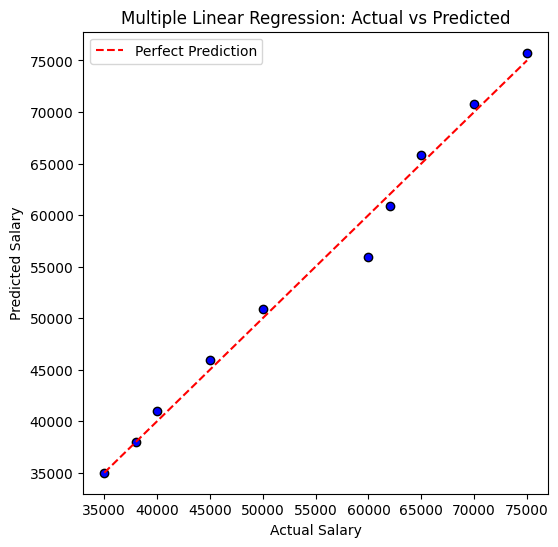

In [7]:
from sklearn.linear_model import LinearRegression

# Prepare multiple input factors
X = df[['YearsExperience', 'Age', 'WorkingHoursPerWeek']]  # Three features
y = df['Salary']  # What we want to predict

# Train model with multiple features
multi_model = LinearRegression()
multi_model.fit(X, y)  # Learn how all features affect salary

# Make predictions using all three features
y_pred = multi_model.predict(X)

# Show the learned formula
print("Coefficients:", multi_model.coef_)  # How much each feature affects salary
print("Intercept:", multi_model.intercept_)  # Base salary

# Create comparison graph
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, color='blue', edgecolor='k')  # Plot actual vs predicted
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Perfect Prediction")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

The Output:

    Coefficients: How much salary changes for each unit of each feature

        Example: [5000, 200, 100] means:

            +1 year experience = +$5,000

            +1 year age = +$200

            +1 work hour/week = +$100

    Intercept: Base salary when all features are zero

# Q4: Split the dataset into training (70%) and testing (30%) sets. Train a Linear Regression model and evaluate it using Mean Squared Error (MSE).

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load the data file
df = pd.read_csv("employee_salary_data.csv")

# Prepare input and output data
X = df[['YearsExperience', 'Age', 'WorkingHoursPerWeek']]  # Three prediction factors
y = df['Salary']  # What we want to predict

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Training set (70%): Used to teach the model
# Test set (30%): Used to test the model (like a final exam)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)  # Learn patterns from training data only

# Test the model on unseen data
y_pred = model.predict(X_test)  # Make predictions on test data

# Measure how good the model is
print("Test MSE:", mean_squared_error(y_test, y_pred))  # Lower number = better

Test MSE: 7413163.99960314
